# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: s3://project-2-naf/yelp_academic_dataset_business.json

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("scipy==1.7.1")
sc.install_pypi_package("seaborn==0.11.2")


VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1638497845281_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
cycler                     0.11.0   
jmespath                   0.10.0   
joblib                     0.16.0   
kiwisolver                 1.3.2    
lxml                       4.5.2    
matplotlib                 3.2.1    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pandas                     1.0.3    
pip                        9.0.1    
py-dateutil                2.2      
pyparsing                  3.0.6    
python-dateutil            2.8.2    
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
scipy                      1.7.1    
seaborn                    0.11.2   
setuptools                 28.8.0   
s

# Importing

Now, import the installed packages from the previous block below.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [4]:
business = spark.read.json('s3://project-2-naf/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data

Display the number of rows and columns in our dataset.

In [5]:
print(f'Columns: {len(business.columns)}  | Rows: {business.count()}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14  | Rows: 160585

Display the DataFrame schema below.

In [6]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 6 rows with the following columns:
* business_id
* name
* city
* state
* stars
* categories

In [7]:
business.select('business_id', 'name', 'city', 'state', 'stars', 'categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as Active Life, for instance
* What are the top 20 most popular categories available?

# Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [8]:
from pyspark.sql.functions import explode, split

business.exploded = business.withColumn('category',explode(split('categories',', ')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [9]:
business.exploded.select('business_id', 'category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|    category|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

# Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [10]:
business.exploded.createOrReplaceTempView("category_sql")
df_table = spark.sql(
'''
SELECT business_id, category
FROM category_sql 
'''
)


unique_categories = spark.sql(
'''
SELECT DISTINCT(category)
FROM category_sql
''')

unique_categories.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1330

# Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

# Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

In [11]:
business.exploded.select('category').groupby('category').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Dermatologists|  351|
|      Paddleboarding|   67|
|        Aerial Tours|    8|
|         Hobby Shops|  610|
|          Bubble Tea|  779|
|             Embassy|    9|
|             Tanning|  701|
|            Handyman|  507|
|      Aerial Fitness|   13|
|             Falafel|  141|
|       Outlet Stores|  184|
|        Summer Camps|  308|
|     Clothing Rental|   37|
|      Sporting Goods| 1864|
|     Cooking Schools|  114|
|  College Counseling|   20|
|  Lactation Services|   47|
|Ski & Snowboard S...|   55|
|             Museums|  336|
|     Baseball Fields|   17|
+--------------------+-----+
only showing top 20 rows

# Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories.

In [12]:
barchart_df = business.exploded.groupby('category').count().orderBy('count', ascending = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
top_20 = barchart_df.head(20)
top_20_df = pd.DataFrame(top_20)
top_20_df.columns = ['category', 'count']
top_20_df
top_20_final = top_20_df.sort_values(by = 'count', ascending = True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

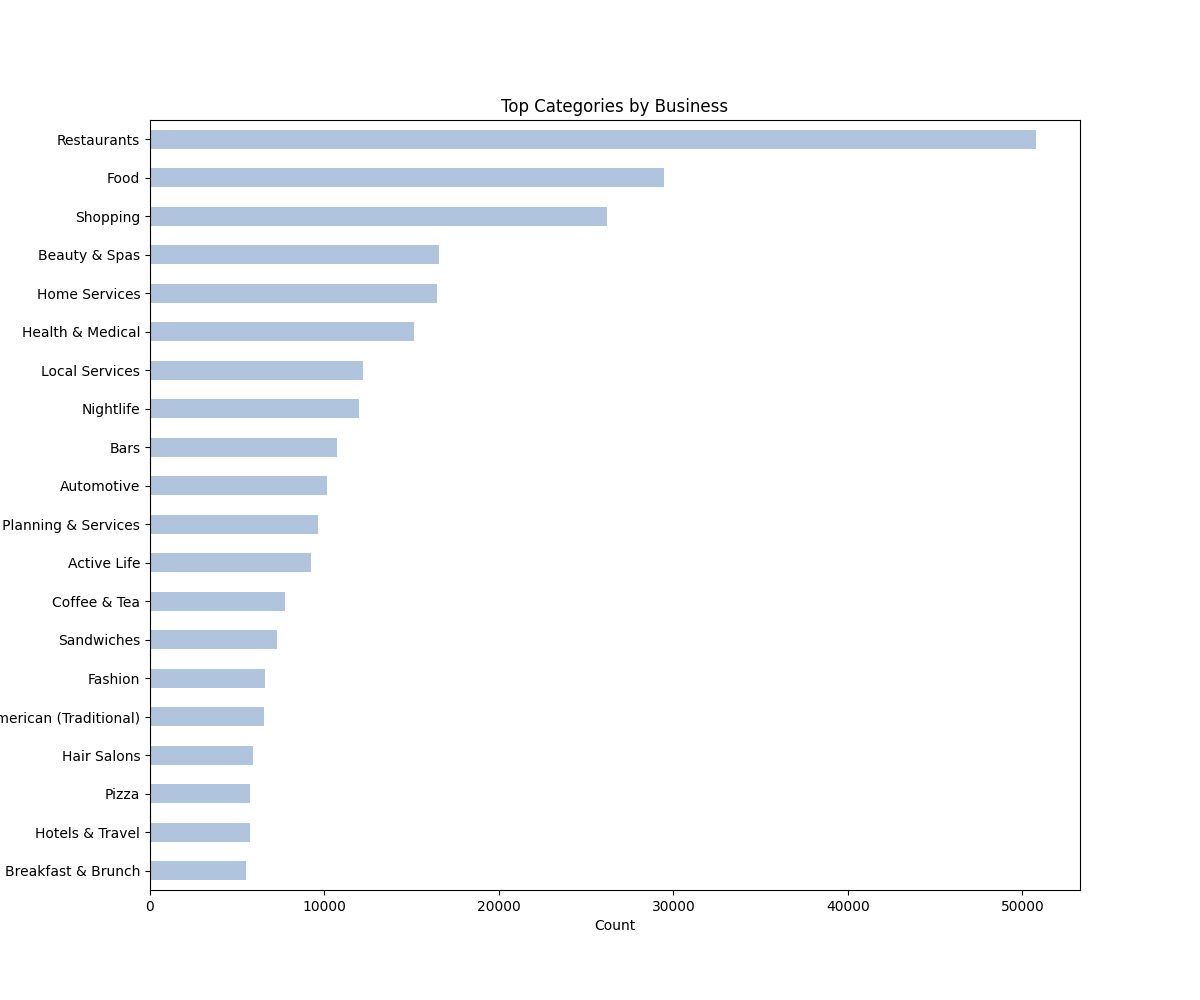

In [14]:
plt.figure(figsize=(10,6))
top_20_final.plot(kind='barh', x = 'category', figsize=(12,10), color= 'lightsteelblue', legend =  False)
plt.title('Top Categories by Business')
plt.ylabel('Category')
plt.xlabel('Count')

%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

# Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [6]:
reviews = spark.read.json('s3://project-2-naf/*yelp_academic_dataset_review.json')
reviews.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [16]:
reviews.select('business_id', 'stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who **took the time to submit a written review.**

In [17]:
reviews.groupby('business_id').agg({"stars": "avg"}).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|yHtuNAlYKtRZniO8O...|4.714285714285714|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
|uEUweopM30lHcVxjO...|              3.0|
|L3WCfeVozu5etMhz4...|              4.2|
|XzXcpPCb8Y5huklEN...|4.666666666666667|
+--------------------+-----------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

In [18]:
star_avg = reviews.groupby('business_id').agg({"stars": "avg"})
business_sub = business.select('business_id', 'name', 'city', 'state', 'stars')
final_join = star_avg.join(business_sub, business_sub.business_id == star_avg.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [19]:
from pyspark.sql.functions import col, asc,desc
final_join.select("avg(stars)", "stars", "name", "city", "state").orderBy(col("avg(stars)").desc()).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+-----------------+-----+
|avg(stars)|stars|                name|             city|state|
+----------+-----+--------------------+-----------------+-----+
|       5.0|  5.0|      Sunflower Cafe|Altamonte Springs|   FL|
|       5.0|  5.0|beBélieve Birth a...|          Orlando|   FL|
|       5.0|  5.0|Laurie Flood - Ke...|           Austin|   TX|
|       5.0|  5.0|    Efficient Moving|      Worthington|   OH|
|       5.0|  5.0|Becca Blevins Pho...|         Portland|   OR|
+----------+-----+--------------------+-----------------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

(row['avg(stars)'] - row['stars']) / row['stars']

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [20]:
skewness_stars=final_join.select((final_join["avg(stars)"]-final_join["stars"])/final_join["stars"])
skewness = skewness_stars.groupby('((avg(stars) - stars) / stars)').count()
sk_df = skewness_stars.toPandas()
sk_df.columns=['skew']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

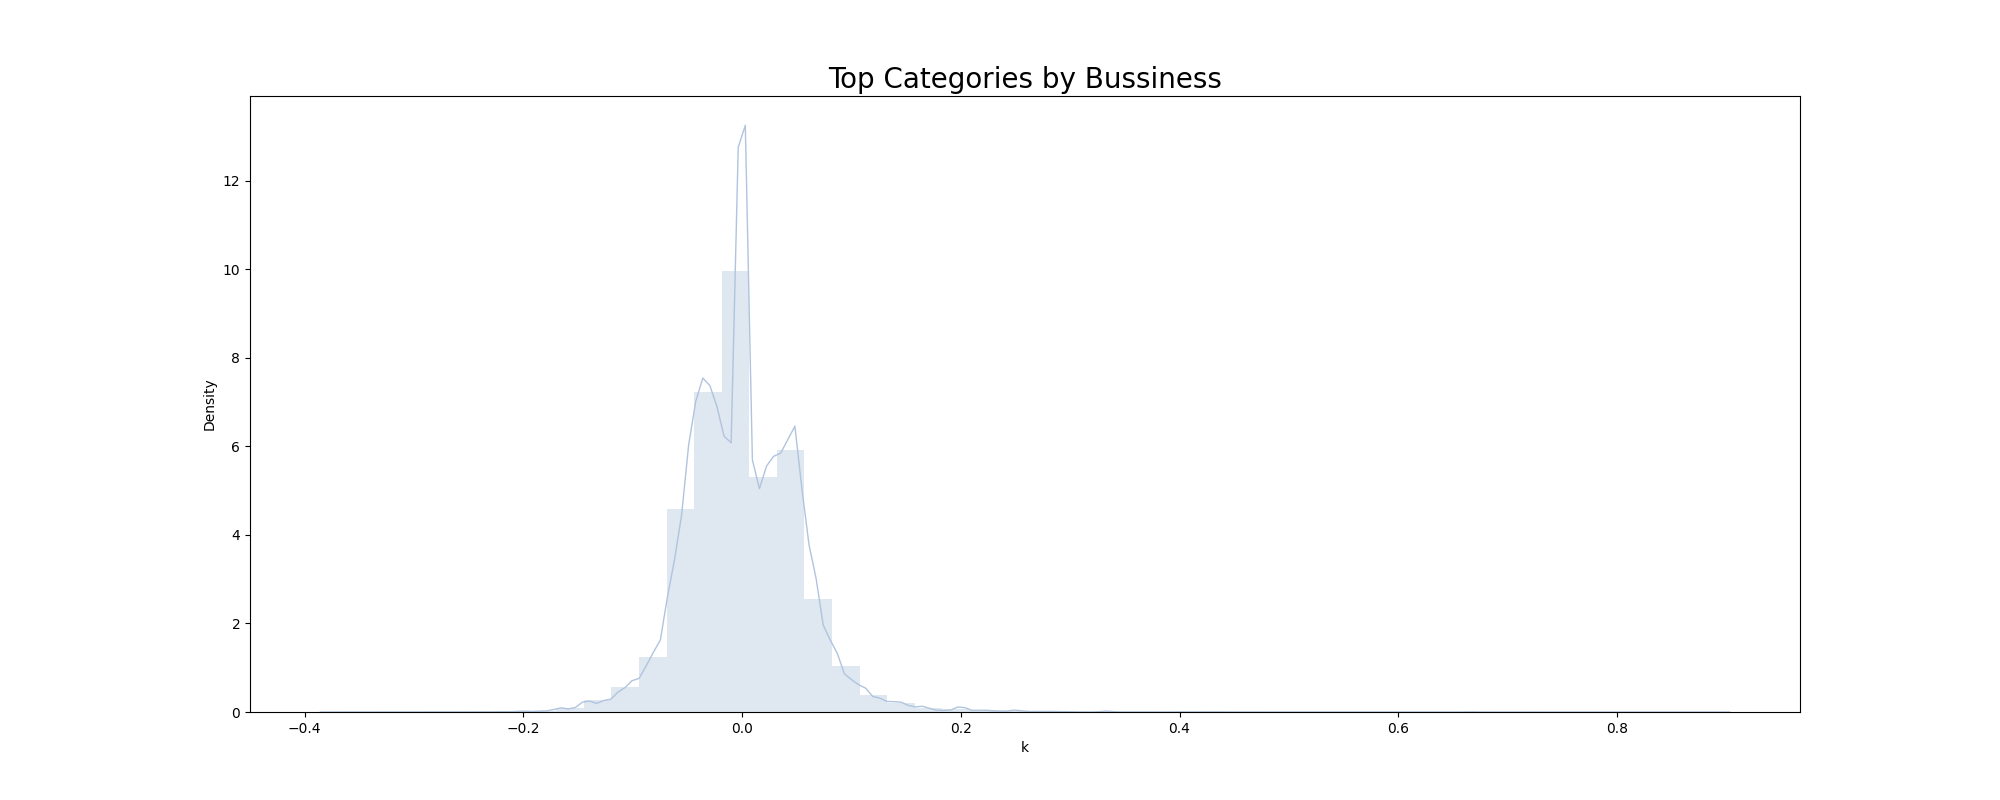

In [21]:
plt.figure(figsize=(20,8))
sns.distplot(sk_df['skew'], hist=True, kde=True, bins=50, color = 'lightsteelblue', kde_kws={'linewidth':1})
plt.title('Top Categories by Bussiness', fontsize=20)
plt.xlabel('k')
%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph.

Based on the plot, we can see this is hard to interpret whether the Yelp Reviews are negatively or positively skewed. However, if we observe it carefully, we might be able to observe a very minimal positively skewed distribution.

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the Users dataset and join on either the **business** or **reviews** dataset

* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

# Loading and Analyzing User Dataset

Loading the User Dataset

In [22]:
user = spark.read.json('s3://project-2-naf/*yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Some basic components of this Dataset:

In [23]:
print(f'Columns: {len(user.columns)}  | Rows: {user.count()}')
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 22  | Rows: 2189457
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

Now, I am joining Reviews, User & Business Dataset altogether so that all data will be together.

In [24]:
user_short = user.drop('cool', 'funny', 'useful', 'name')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
last_df = reviews.join(user_short, reviews.user_id == user_short.user_id)
last_df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite', 'fans', 'friends', 'review_count', 'user_id', 'yelping_since']

In [26]:
business_short  = business.drop('review_count', 'stars')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
final_df = last_df.join(business_short, last_df.business_id == business_short.business_id)
final_df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite', 'fans', 'friends', 'review_count', 'user_id', 'yelping_since', 'address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'state']

The Joining is completed. I joined Reviews and Users first. Then joined the new df with the business df so that we will have all data together. I had to drop few columns to avoid duplication.

### Data Analysis With Plots

In this section, I will be analyzing the combined dataset and generate few plots to visualize.

**Analysis-1:** For the first one, I created a barplot to view average stars based on different states. This will give us an idea about the overall performance of different states.

In [28]:
final_df.createOrReplaceTempView("final_df_star")
final_df_str = spark.sql(
'''
SELECT state, AVG(average_stars) as avg_stars
FROM final_df_star 
GROUP BY state
ORDER BY avg_stars DESC
'''
)

final_df_str.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------------+
|state|         avg_stars|
+-----+------------------+
|   HI| 4.622857142857143|
|   NY| 4.183333333333334|
|  ABE|              4.11|
|   MN|4.0616666666666665|
|   DE| 4.057142857142857|
+-----+------------------+
only showing top 5 rows

In [29]:
final_df_str_pandas = final_df_str.toPandas() 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

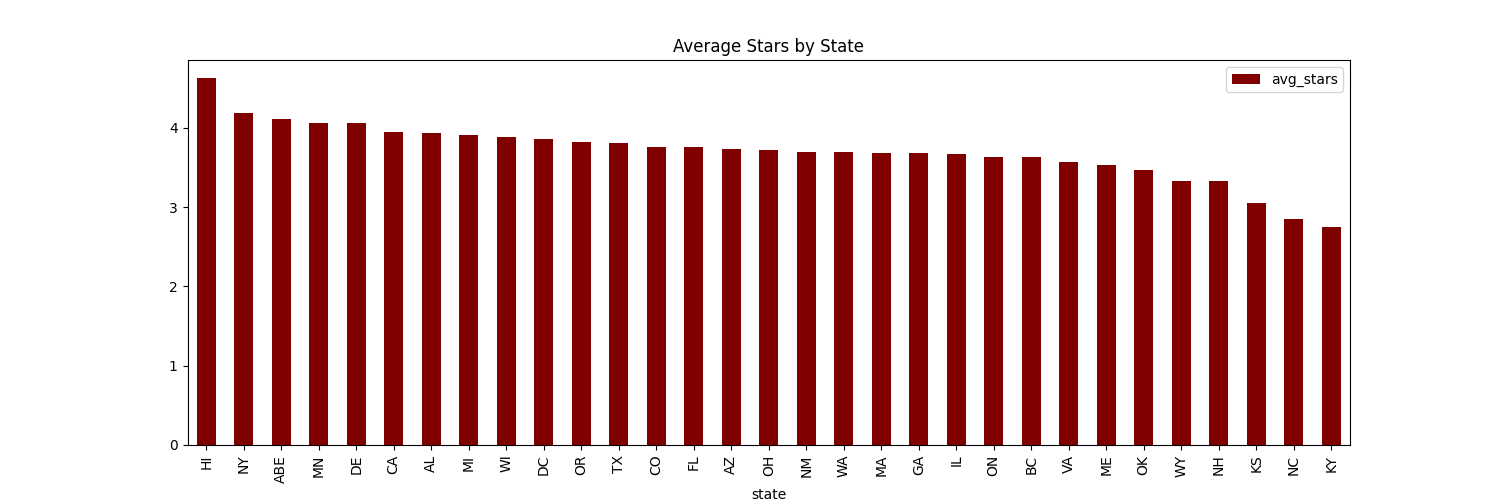

In [30]:
final_df_str_pandas.plot.bar(x='state', y='avg_stars',figsize=(15,5),title='Average Stars by State',color='maroon')
%matplot plt

According to the above plot, **Hawaii** has the highest average stars and **Kentucky** has the lowest. However, the most interesting finding is most of the states are very *close* to each other.

**Analysis-2:** For this one, I created a distribution of the Variance of the Stars of the Elite group only. This will show us how *far* is the stars from their average for elite groups only.

In [31]:
user.createOrReplaceTempView("user")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
elite_group = spark.sql(
'''
SELECT user_id, average_stars 
FROM user
WHERE elite NOT LIKE  ''
''')
elite_group.show(10)
elite_group.createOrReplaceTempView("elite_group_only")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|             user_id|average_stars|
+--------------------+-------------+
|q_QQ5kBBwlCcbL1s4...|         3.85|
|dIIKEfOgo0KqUfGQv...|         4.09|
|D6ErcUnFALnCQN4b1...|         3.76|
|JnPIjvC0cmooNDfsa...|         3.77|
|37Hc8hr3cw0iHLoPz...|         3.72|
|n-QwITZYrXlKQRiV3...|         3.59|
|cojecOwQJpsYDxnjt...|         3.79|
|1jXmzuIFKxTnEnR0p...|         3.43|
|-8QoOIfvwwxJ4sY20...|         3.88|
|EtofuImujQBSo02xa...|         3.83|
+--------------------+-------------+
only showing top 10 rows

In [35]:
elite_difference = spark.sql(
'''
SELECT DISTINCT (final_df_star.average_stars - final_df_star.stars) AS Elite_Variance
FROM final_df_star

''')
elite_difference.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|      Elite_Variance|
+--------------------+
|  1.1900000000000004|
| -3.2199999999999998|
|-0.17999999999999972|
| 0.20000000000000018|
| -1.8900000000000001|
+--------------------+
only showing top 5 rows

In [36]:
elite_difference_pd = elite_difference.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

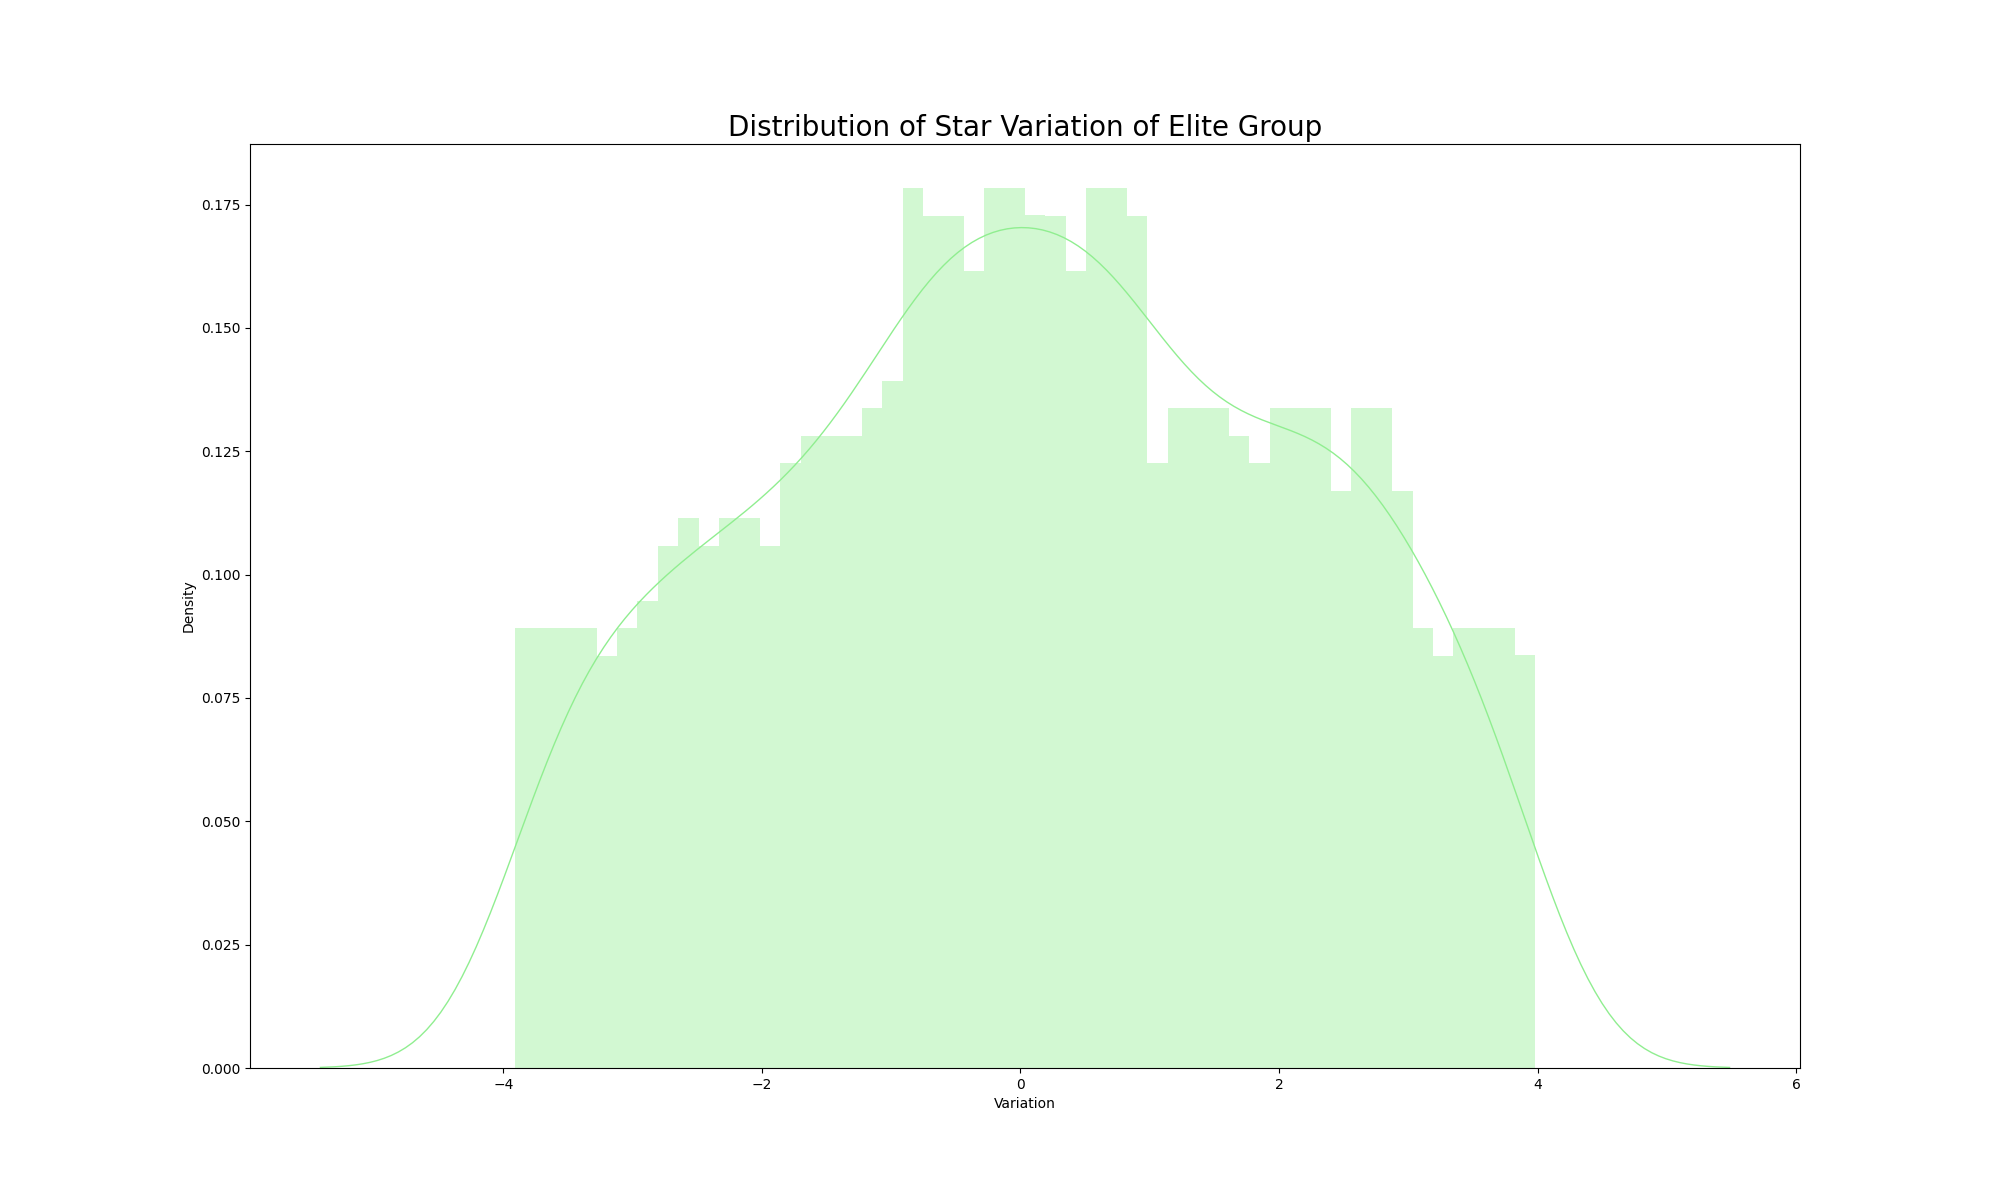

In [37]:
plt.figure(figsize=(20,12))
sns.distplot(elite_difference_pd['Elite_Variance'], hist=True, kde=True, bins=50, color = 'lightgreen', 
             kde_kws={'linewidth':1})
plt.title('Distribution of Star Variation of Elite Group', fontsize=20)
plt.xlabel('Variation')

%matplot notebook
%matplot plt

According to this plot, most of the variations are close to the middle. However, this is almost equally skewed to both side as well.

Finally, I have created above two plots just to get a better idea about the dataset which we can use for further analysis in future.